In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
import scipy.io
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
plt.rcParams["figure.figsize"] = (10,6)
sns.set_theme(style="darkgrid", palette="pastel")

In [2]:
#load dataset 
data = pd.read_csv("./P2/breast_data.csv",header=None)
labels = np.array(pd.read_csv("./P2/breast_labels.csv",header=None)[0])

In [3]:
def CalculateMetricsAndPlot(true_label, predicted_label,color="Blues",text=""):
    #Check types of labels
    predicted_label = np.array(predicted_label).astype(np.int64)
    
    #calculate metrics
    acc = round(accuracy_score(true_label,predicted_label)*100,2)
    
    #check if only label of cluster is assumed wrong
    if acc < 50.0 : 
        for i in range(len(predicted_label)):
            if predicted_label[i] == 0 : 
                predicted_label[i] = 1
            else:
                predicted_label[i] = 0
                
    acc = round(accuracy_score(true_label,predicted_label)*100,2)   
    CM = confusion_matrix(true_label, predicted_label)
    precision = round(precision_score(true_label,predicted_label, average='macro'),2)
    
    #plot confusion matrix with accuracy and precision
    sns.heatmap(CM ,annot=True, cmap=color, fmt='g').set_title("Confusion Matrix({2}) | Accuracy={0}% | Precision={1}".format(acc,precision,text))
    plt.show()
    

# normalization data to prevent wrong effect on distance metric
def MinMaxNorm(data):
    return (data - data.min()) / ( data.max() - data.min())

# Clustering function
def kmeanscluster(X,k,mu,tol,maxIter):
    #check if count of clusters equal to given centers
    if k != mu.shape[0]:
        print("Error: Count of initial centers is not equal to k")
        return 
    
    # copy dataset and make label col
    X = X.copy()
    X["Cluster"] = ""
    
    # iteration loop
    for ite in range(maxIter):
        
        # loop for placing elements into clusters
        for element_index in range(X.shape[0]):
            
            # variable to store element distance to each cluster
            distances = {}
            
            # measuring distance to each cluster
            for cluster_index in range(mu.shape[0]):
                
                element_value = X[list(range(30))].iloc[element_index]
                cluster_value = mu.iloc[cluster_index]
                
                distance = euclidean_distances([element_value],[cluster_value])[0][0]
                distances[cluster_index] = distance
              
            # place the element to cluster with min distance
            X.at[element_index,"Cluster"] = int(min(distances,key=distances.get))
            
            
       
        #updating mu for each cluster
        new_mu = mu.copy()
        for cluster_index in range(mu.shape[0]):
            cluster_items = X.loc[X['Cluster'] == cluster_index]
            new_mu.iloc[cluster_index] = cluster_items.mean()
        
        # Check clusters change percentage based on given tolerance
        CheckTolerance = 0
        for cluster_index in range(mu.shape[0]):
            change = (abs(mu.iloc[cluster_index]-new_mu.iloc[cluster_index])/mu.iloc[cluster_index]).mean()
            if abs(change) <= tol :
                CheckTolerance += 1
        
        # if all cluster mu changed less than tolerance, stop clustering       
        if CheckTolerance == mu.shape[0]:
            print("Converged in Iteration {0} based on Tolerance {1}".format(ite+1,tol))
            break
        
        mu = new_mu  
        
    #return clustered matrix
    return X



Converged in Iteration 9 based on Tolerance 0.001


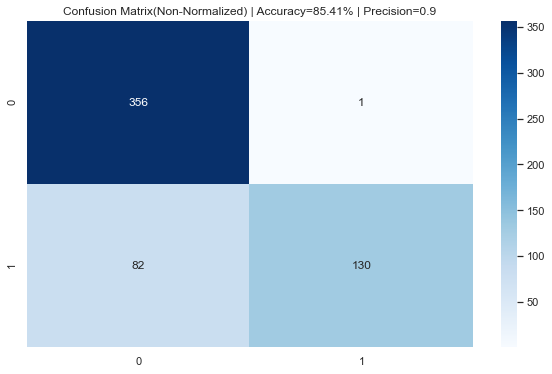

Converged in Iteration 10 based on Tolerance 0.001


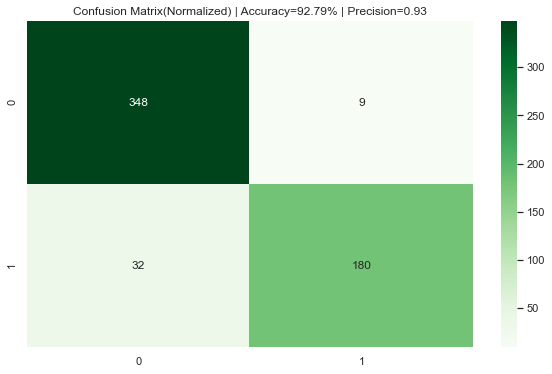

In [4]:
#clustering dataset based on two first rows as centers (dataset is shuffled)

# clustering if data is not normalized
result = kmeanscluster(data,2,data.head(2),0.001,20)
CalculateMetricsAndPlot(labels,result["Cluster"],"Blues","Non-Normalized")

# clustering if data normalized
data_ = MinMaxNorm(data)
result_ = kmeanscluster(data_,2,data_.head(2),0.001,20)
CalculateMetricsAndPlot(labels,result_["Cluster"],"Greens","Normalized")